In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
# Load dataset
merged_data = pd.read_csv('merged_train.csv')

In [3]:
# Visualize dataset
merged_data.head()

,State,County,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Democratic,Republican,Party
0,AZ,apache,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,16298,7810,1
1,AZ,cochise,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,17383,26929,0
2,AZ,coconino,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,34240,19249,1
3,AZ,gila,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,7643,12180,0
4,AZ,graham,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,3368,6870,0


In [4]:
# Task 1

In [5]:
# Partition dataset into training and validationg sets using 80-20 split
x_train, x_val, y_train, y_val = train_test_split(merged_data.drop(['State', 'County', 'FIPS', 'Democratic', 'Republican', 'Party'], axis=1), merged_data[['Democratic', 'Republican', 'Party']], test_size=0.2, random_state=0)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(956, 13)
(956, 3)
(239, 13)
(239, 3)


In [7]:
# Visualize training set: predictor variables
x_train.head()

,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
1090,63355,94.057296,1.314813,1.534212,1.067003,48.011996,36.140794,16.156578,52657,4.187743,7.879569,80.721503,46.142754
103,33461,91.802397,0.878635,5.905382,2.459580,50.521503,38.928902,15.600251,55485,6.384942,13.001171,83.457969,68.038712
745,7131,35.520965,2.131538,61.716449,20.782499,46.893844,45.982331,14.289721,40589,2.109447,32.383600,89.251795,28.750872
1048,58963,94.454149,0.746231,1.831657,3.578515,50.594441,34.287604,17.003884,58171,4.603880,6.360298,59.539254,52.805120
1186,8572,91.565562,0.443304,2.134858,1.656556,46.966869,32.571162,20.496967,54594,4.512276,5.105750,74.537343,49.025557


In [8]:
# Visualize training set: labels
y_train.head()

,Democratic,Republican,Party
1090,13798,13830,0
103,3278,6987,0
745,405,1202,0
1048,19395,6517,1
1186,722,3085,0


In [9]:
# Task 2

In [10]:
# Standardize the training set and the validation set
scaler = StandardScaler() 
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_val_scaled = scaler.transform(x_val)

In [11]:
# Task 3

In [12]:
# Predicting the number of votes cast for the DEMOCRATIC party in each county

In [13]:
# Building Model using all variables

In [14]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled, y_train['Democratic'])
print(fitted_model.coef_)

[ 67699.4769908   -3218.35778818  -1056.15862014  -6992.46123859
   3935.07911344     96.93882291  -4964.31964474  -1591.01933815
   1442.29141648   1302.93524322   3966.55100572 -10069.94516214
    -97.88148769]


In [15]:
predicted = fitted_model.predict(x_val_scaled)

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9312193337733043


In [16]:
# Building Model using the top 4 most significant variables (based on project01 report)

In [17]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 2, 11]], y_train['Democratic'])
print(fitted_model.coef_)

[69256.63509865   752.00100403  2017.87432223 -8892.08450096]


In [18]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.948509180896764


In [19]:
# Removing seemingly least relevant variable (BEST MODEL FOR PREDICTING DEMOCRATIC VOTES)

In [20]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 2, 11]], y_train['Democratic'])
print(fitted_model.coef_)

[69073.08206907  1700.49107316 -8948.82185095]


In [21]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.949133942937187


In [22]:
# Adding multiple other variables to see if R squared can be increased

In [23]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 2, 5, 9, 11, 12]], y_train['Democratic'])
print(fitted_model.coef_)

[ 69323.93712355   1401.31874583   -418.56897963   1840.06113202
 -10276.39011065   1654.62454387]


In [24]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 2, 5, 9, 11, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Democratic'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.9494594555838366


In [25]:
# Predicting the number of votes cast for the REPUBLICAN party in each county

In [26]:
# Building Model using all variables

In [27]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled, y_train['Republican'])
print(fitted_model.coef_)

[44403.15240906  1780.93181212 -2916.59301756  1217.16109357
 -6262.9194413  -1079.28398492  -772.9612049   2630.69368215
  5930.71380695  2062.35379292  3451.83253914 -2960.02130754
 -5698.28690602]


In [28]:
predicted = fitted_model.predict(x_val_scaled)

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6948219003493747


In [29]:
# Building Model using the top 4 most significant variables (based on project01 report)

In [30]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 2, 11]], y_train['Republican'])
print(fitted_model.coef_)

[43826.27499765  2203.84789557 -1872.92686709 -4208.30811836]


In [31]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 2, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6474596835891537


In [32]:
# Removing seemingly least relevant variable

In [33]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 11]], y_train['Republican'])
print(fitted_model.coef_)

[43640.78531753  3033.48577167 -4146.42294453]


In [34]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 11]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6499687277390198


In [35]:
# Adding more variables that seem relevant to republican counties to see if R squared can be increased

In [36]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 7, 8, 12]], y_train['Republican'])
print(fitted_model.coef_)

[42791.44622898  3446.69948382  2495.11631892  4028.26822585
 -4816.50015819]


In [37]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 7, 8, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6737301771404883


In [38]:
# Removing some variables to reduce overfitting

In [39]:
model = linear_model.LinearRegression()
fitted_model = model.fit(x_train_scaled[:, [0, 1, 12]], y_train['Republican'])
print(fitted_model.coef_)

[43470.26429267  4715.26381654 -5038.14337356]


In [40]:
predicted = fitted_model.predict(x_val_scaled[:, [0, 1, 12]])

corr_coef = numpy.corrcoef(predicted, y_val['Republican'])[1, 0] 
R_squared = corr_coef**2
print(R_squared)

0.6692570988078124


In [178]:
X = merged_data.drop(['State', 'County', 'FIPS', 'Party'], axis=1)
Y = merged_data['Party']

In [179]:
#Task 5

In [180]:
#Hierarchical Clustering

In [181]:
clustering = linkage(X,method = "single",metric = "euclidean")

In [182]:
clusters = fcluster(clustering,2,criterion = 'maxclust')

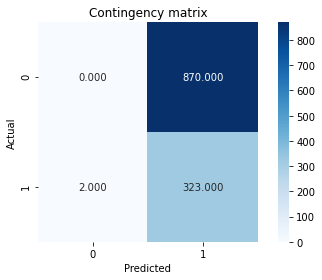

In [183]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data["Party"],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [184]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.005608925119335567, 0.9513953004806586]


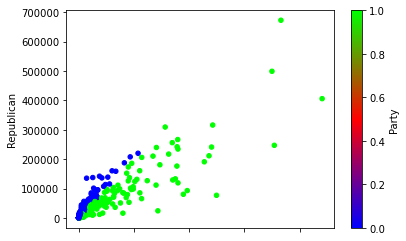

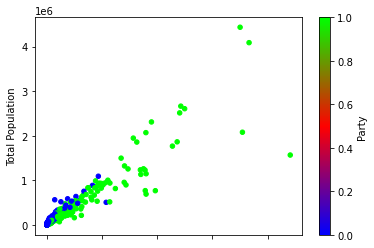

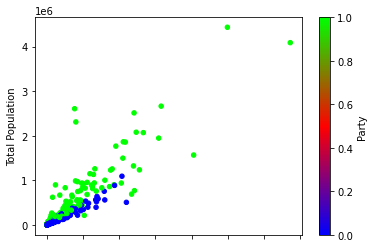

In [185]:
# Plot clusters found using hierarchical clustering with single linkage method
# data['clusters'] = clusters
ax = merged_data.plot(kind = 'scatter', x = 'Democratic', y = 'Republican', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Democratic', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Republican', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)

In [186]:
# Complete Linkage

In [187]:
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

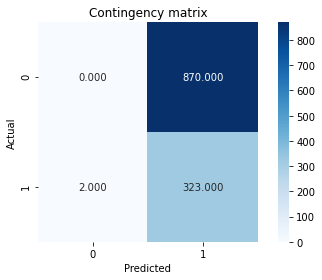

In [188]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data['Party'],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [189]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.005608925119335567, 0.41589692700729125]


In [190]:
#Change the number of clusters

In [194]:
clustering = linkage(X, method = "complete", metric = "euclidean")
clusters = fcluster(clustering,10, criterion = 'maxclust')

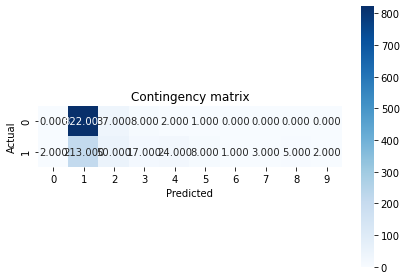

In [197]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data['Party'],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [198]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.2302245525942677, 0.41589692700729125]


In [212]:
#KMeans Clustering iteration = 10

In [213]:
clustering = KMeans(n_clusters = 4, init = 'random', n_init = 1, random_state = 0).fit(X)
clusters = clustering.labels_

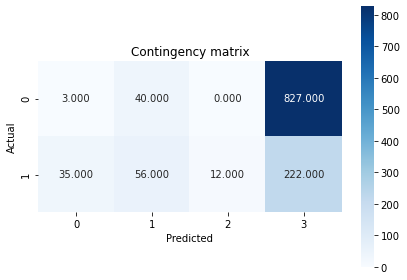

In [214]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data['Party'],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [215]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.2156434985579863, 0.41589692700729125]


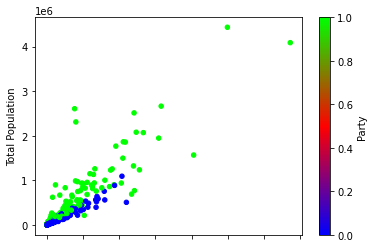

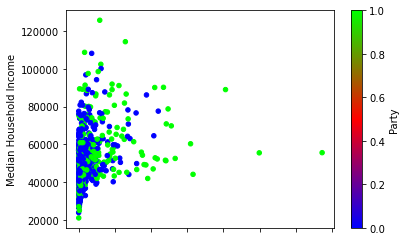

In [203]:
ax = merged_data.plot(kind = 'scatter', x = 'Republican', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Republican', y = 'Median Household Income', c = 'Party', colormap = plt.cm.brg)

In [204]:
#KMeans Clustering iteration = 10

In [222]:
clustering = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10).fit(X)
# clustering = KMeans(n_clusters = 4, init = 'random', n_init = 20, random_state = 0).fit(X)
clusters = clustering.labels_

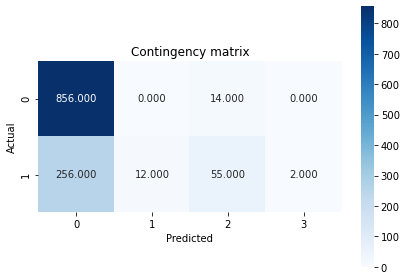

In [223]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data['Party'],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [224]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.17128374506413407, 0.41589692700729125]


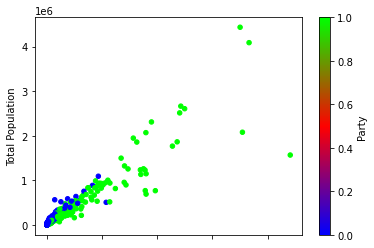

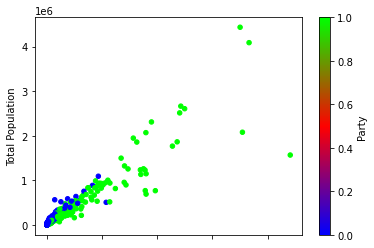

In [208]:
ax = merged_data.plot(kind = 'scatter', x = 'Democratic', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Democratic', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)

In [209]:
#DBSCAN

In [210]:
clustering = DBSCAN(eps = 5, min_samples = 3, metric = "euclidean").fit(X)
clusters = clustering.labels_

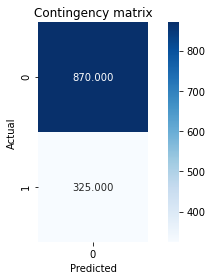

In [211]:
cont_matrix = metrics.cluster.contingency_matrix(merged_data['Party'],clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [94]:
adjusted_rand_index = metrics.adjusted_rand_score(merged_data['Party'], clusters)
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.0, 0.41589692700729125]


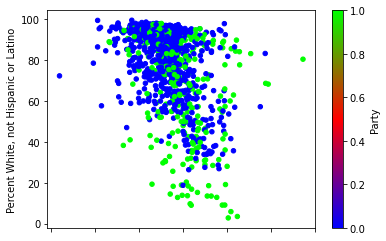

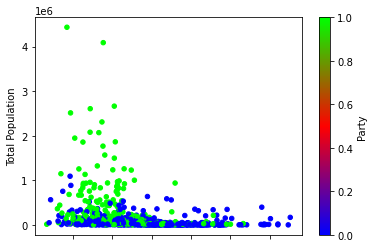

In [95]:
ax = merged_data.plot(kind = 'scatter', x = 'Percent Age 29 and Under', y = 'Percent White, not Hispanic or Latino', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Percent Age 65 and Older', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)

In [ ]:
# Evaluation metrics

In [71]:
silhouette_coefficient = metrics.silhouette_score(X, merged_data['Party'], metric = "euclidean")
print(silhouette_coefficient)

0.41589692700729125


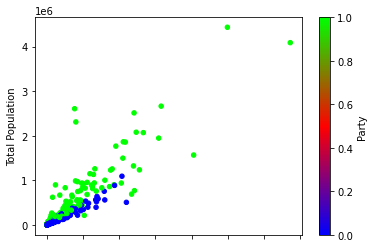

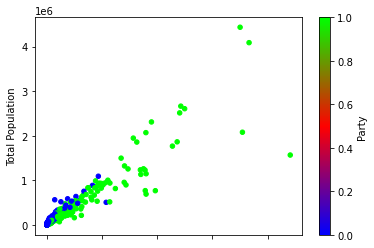

In [74]:
ax = merged_data.plot(kind = 'scatter', x = 'Republican', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)
ax = merged_data.plot(kind = 'scatter', x = 'Democratic', y = 'Total Population', c = 'Party', colormap = plt.cm.brg)